In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode, pearsonr, spearmanr

In [2]:
df = pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')
results = {}
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [3]:
columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

In [4]:
for col in columns:
    stats = {}
    data = df[col]
    stats['mean'] = data.mean()
    stats['median'] = data.median()
    stats['mode'] = data.mode().tolist() if not data.mode().empty else None
    stats['min'] = data.min()
    stats['max'] = data.max()
    stats['std'] = data.std()
    stats['var'] = data.var()
    stats['skewness'] = skew(data) if len(data) > 2 else None
    stats['kurtosis'] = kurtosis(data) if len(data) > 2 else None
    stats['count'] = data.count()
    stats['missing'] = df[col].isnull().sum()
    results[col] = stats

for col, stats in results.items():
    print(f'\nColumn: {col}')  
    for stat, value in stats.items():
        print(f'{stat}: {value}')


Column: passenger_count
mean: 1.6814908260154964
median: 1.0
mode: [1]
min: 0
max: 9
std: 1.3379235173495294
var: 1.7900393382769364
skewness: 2.0850216279031417
kurtosis: 3.2101127056115093
count: 12748986
missing: 0

Column: trip_distance
mean: 13.459129611562835
median: 1.68
mode: [0.9]
min: 0.0
max: 15420004.5
std: 9844.094218363605
var: 96906190.98001978
skewness: 1148.770863897464
kurtosis: 1429173.6577263
count: 12748986
missing: 0

Column: fare_amount
mean: 11.905659425777076
median: 9.0
mode: [6.0]
min: -450.0
max: 4008.0
std: 10.302537135823986
var: 106.14227143503228
skewness: 12.615395023816061
kurtosis: 2555.2037317237982
count: 12748986
missing: 0

Column: total_amount
mean: 15.108294537306733
median: 11.16
mode: [6.8]
min: -450.3
max: 3950611.6
std: 1106.503246711004
var: 1224349.434981993
skewness: 3569.886037615243
kurtosis: 12745716.26418843
count: 12748986
missing: 0

Column: tip_amount
mean: 1.8538136460421244
median: 1.0
mode: [0.0]
min: -92.42
max: 3950588.8
std:

skewness is a measure of asymmetricity of graph and kurtosis means how much variance is coming from tail, < 3 = less outliers, 3 means same as normal distribution and > 3 means more ouliers

so values show that most values are centered around 0 but some values are there which are very large and due to them the curve is going very far, else it would have a much shorter range

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for passenger_count


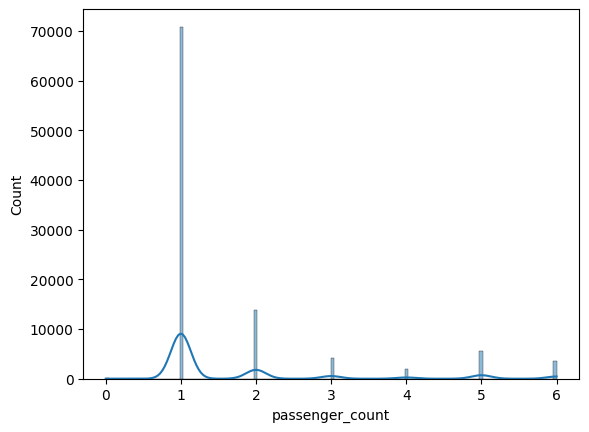

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for trip_distance


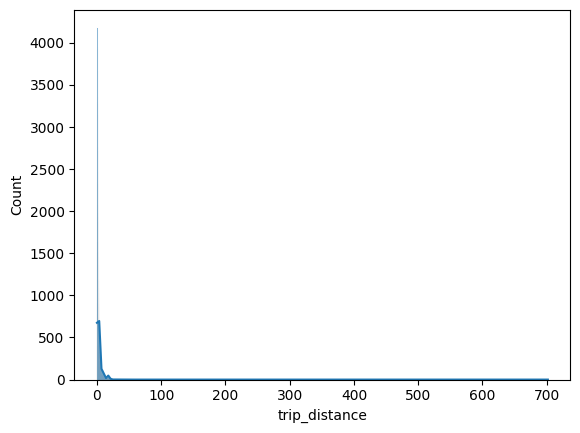

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for fare_amount


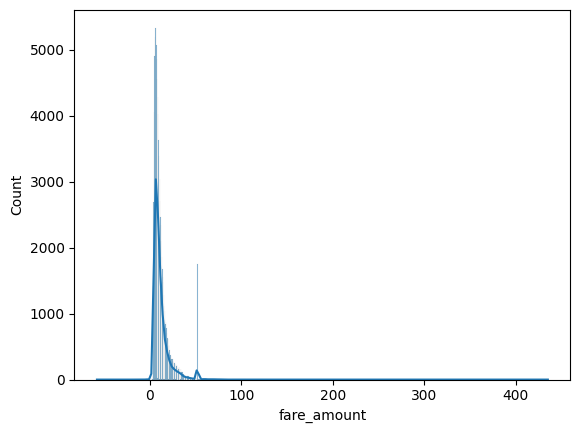

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for total_amount


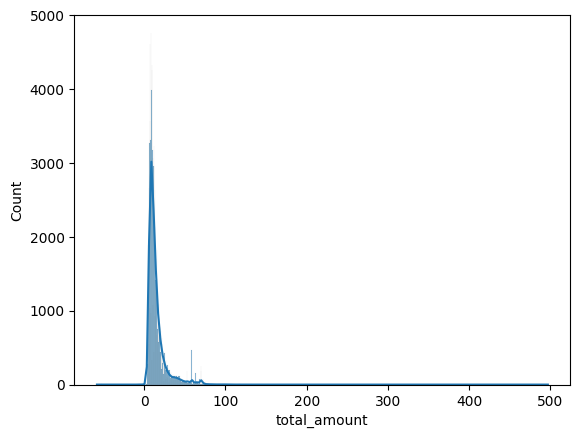

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for tip_amount


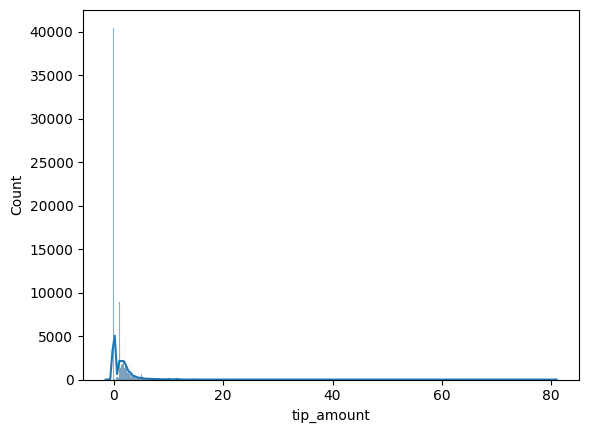

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa histogram che for extra


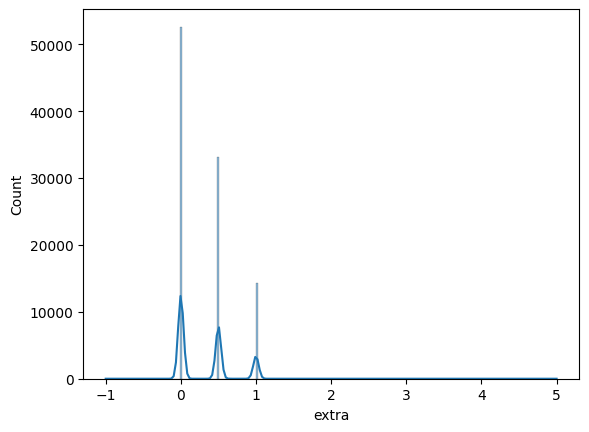

In [5]:
# i am going to plot histogram, frequency polygon, box plot, violin plot and density plot
import matplotlib.pyplot as plt
import seaborn as sns

df = df.replace([np.inf, -np.inf], np.nan)
df = df.sample(n=100000, random_state=42)

for col in columns:
    sns.histplot(df[col], kde=True)
    print(f"aa histogram che for {col}")
    plt.show()

the plots show that most columns have values concentrated in a small range, but there are some extreme values which stretch the graph. for example, in fare and total amount, most trips are short and cheap, but a few trips are very expensive, which makes the range large. for passenger count, most rides are with 1 or 2 people, but sometimes there are more. overall, the data is not perfectly symmetric and has some outliers.

aa frequency polygon che for passenger_count


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


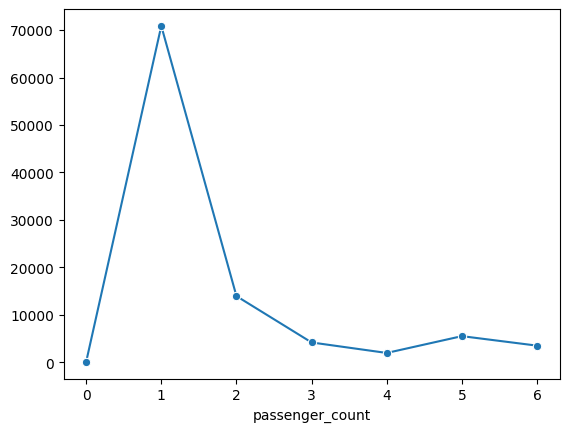

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa frequency polygon che for trip_distance


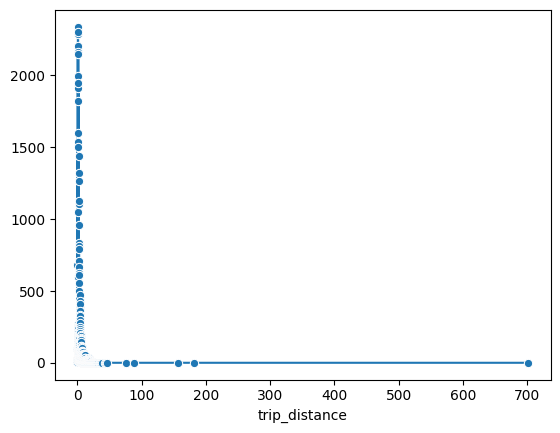

aa frequency polygon che for fare_amount


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


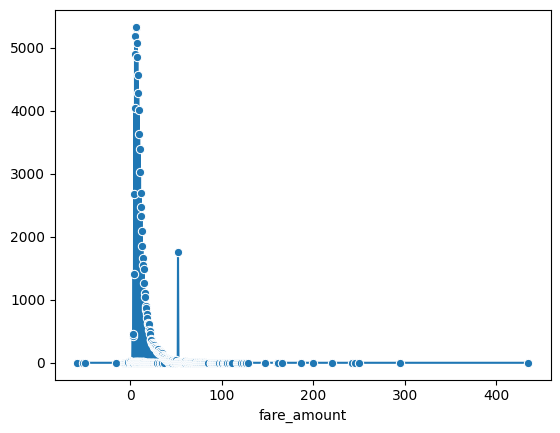

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa frequency polygon che for total_amount


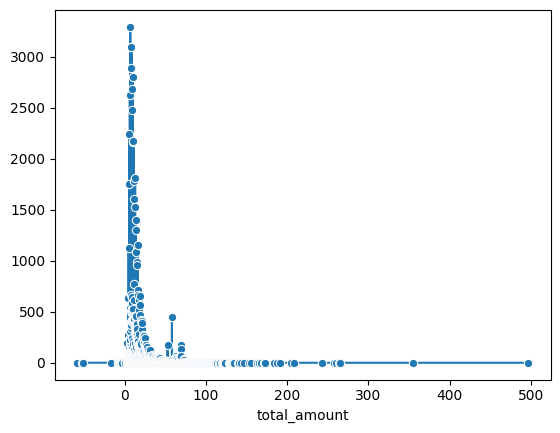

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa frequency polygon che for tip_amount


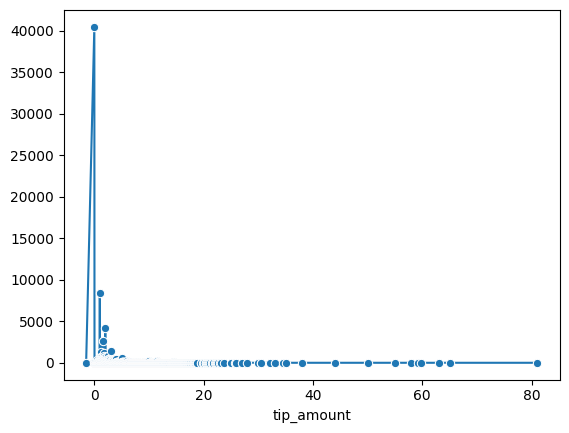

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa frequency polygon che for extra


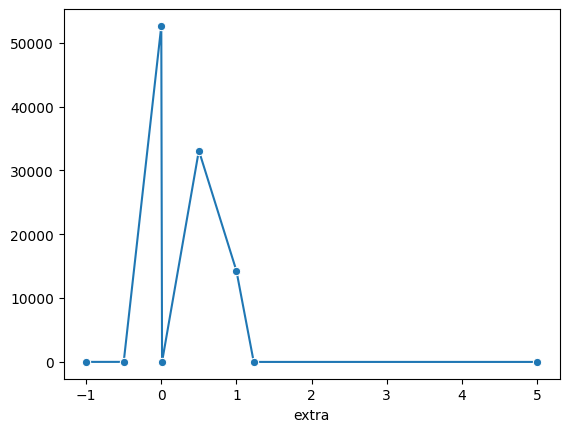

In [6]:
# frequency polygon
for col in columns:
    sns.lineplot(x=df[col].value_counts().index, y=df[col].value_counts().values, marker='o')
    print(f"aa frequency polygon che for {col}")
    plt.show()

same explaination can be derived so i am not writing

aa box plot che for passenger_count


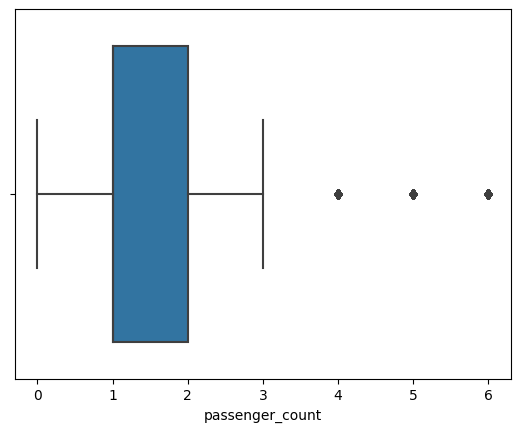

aa box plot che for trip_distance


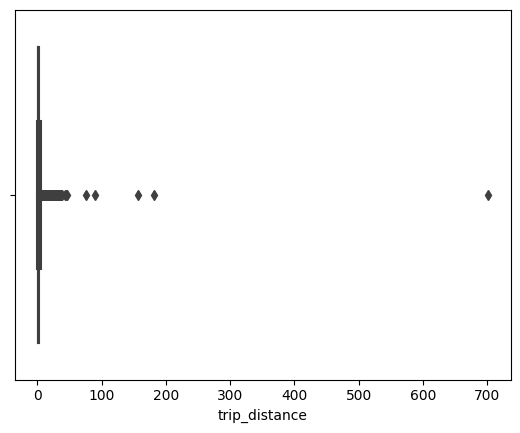

aa box plot che for fare_amount


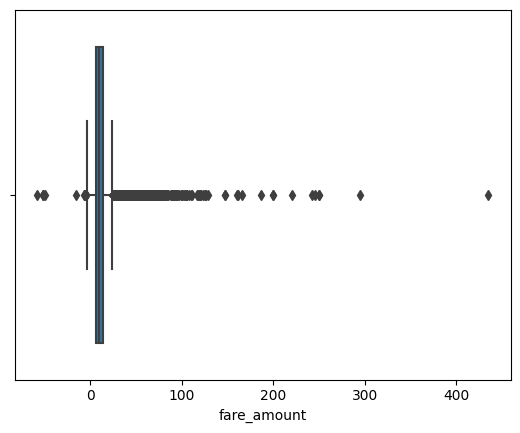

aa box plot che for total_amount


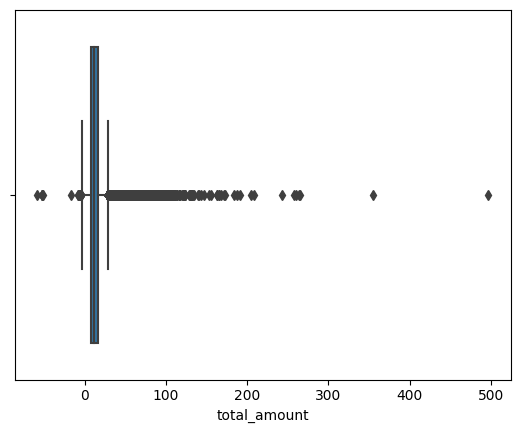

aa box plot che for tip_amount


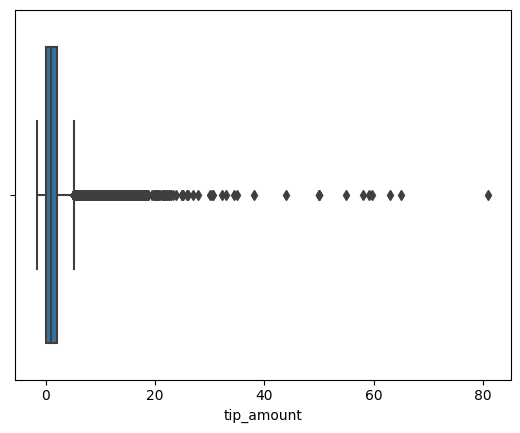

aa box plot che for extra


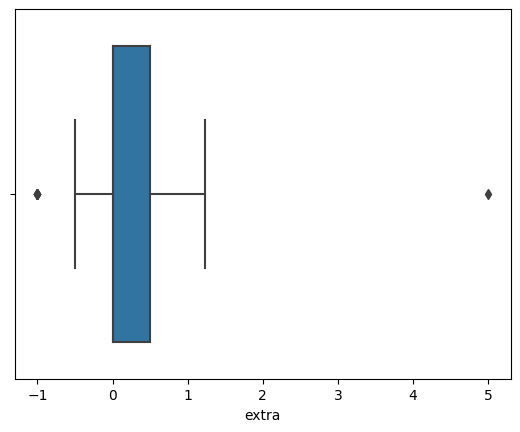

In [7]:
# box plot
for col in columns:
    sns.boxplot(x=df[col])
    print(f"aa box plot che for {col}")
    plt.show()

box plot of extras and passenger counts are normal as their IQR is such that it covers all the values but in case of others the values are so concentrated that theri IQR is so low that there shows many outliers

aa violin plot che for passenger_count


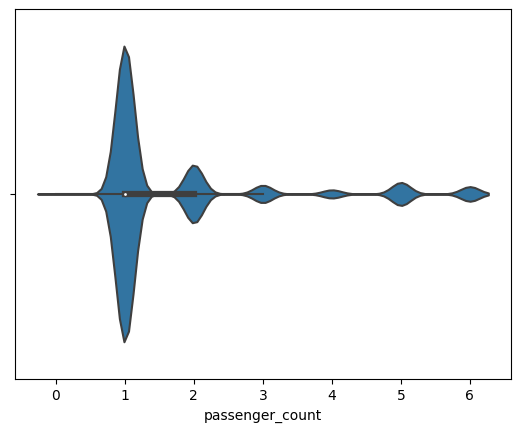

aa violin plot che for trip_distance


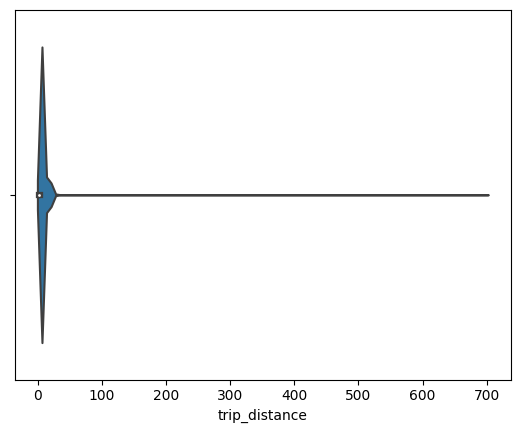

aa violin plot che for fare_amount


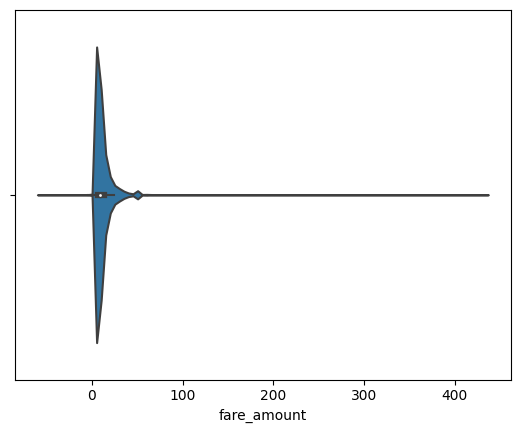

aa violin plot che for total_amount


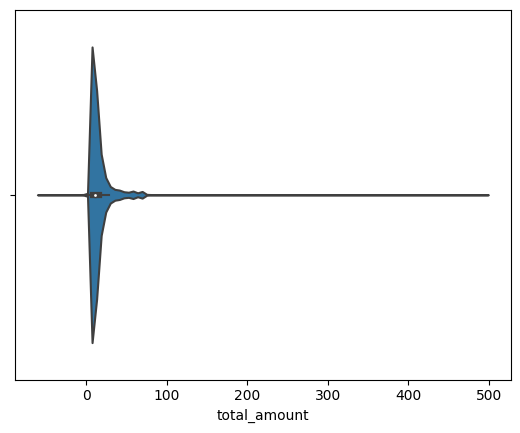

aa violin plot che for tip_amount


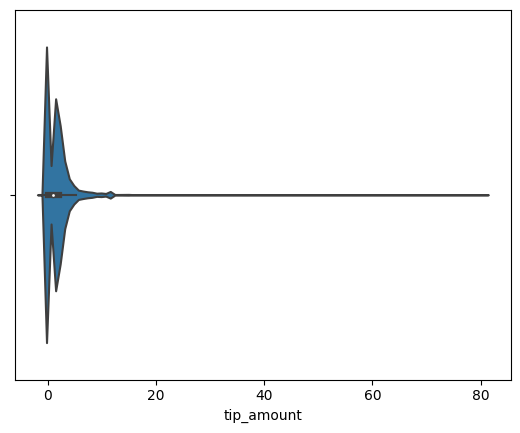

aa violin plot che for extra


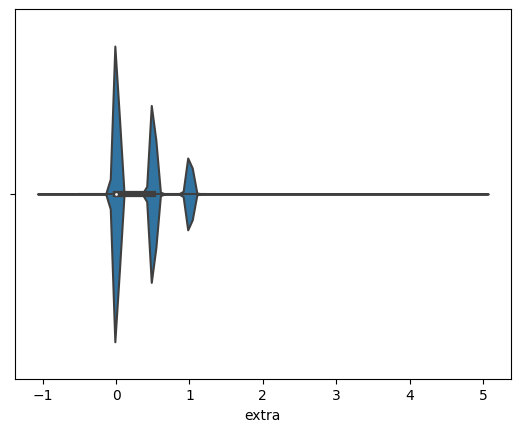

In [8]:
#violin plot
for col in columns:
    sns.violinplot(x=df[col])
    print(f"aa violin plot che for {col}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for passenger_count


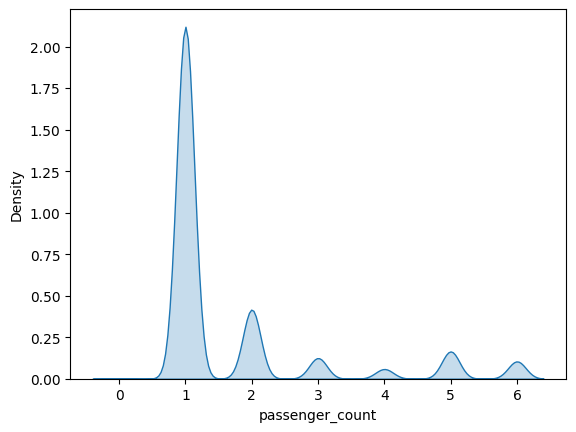

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for trip_distance


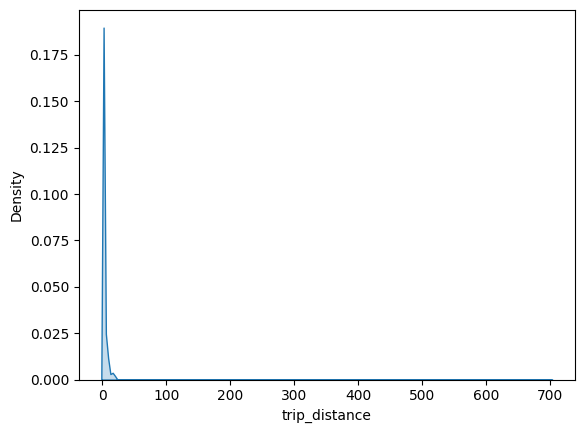

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for fare_amount


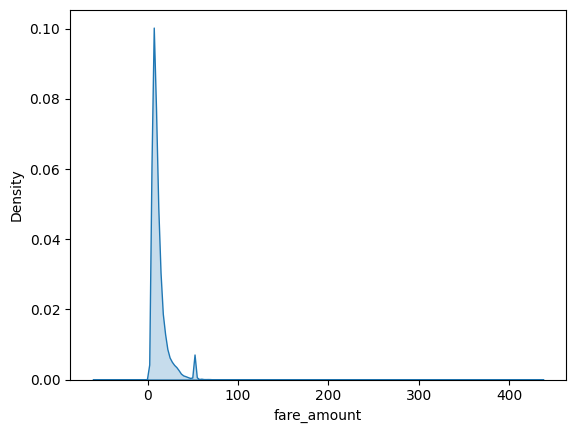

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for total_amount


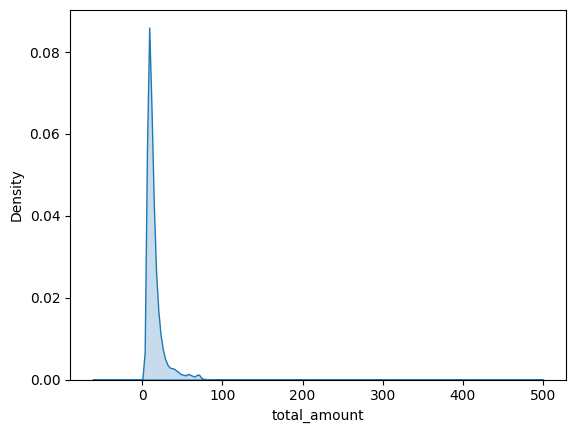

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for tip_amount


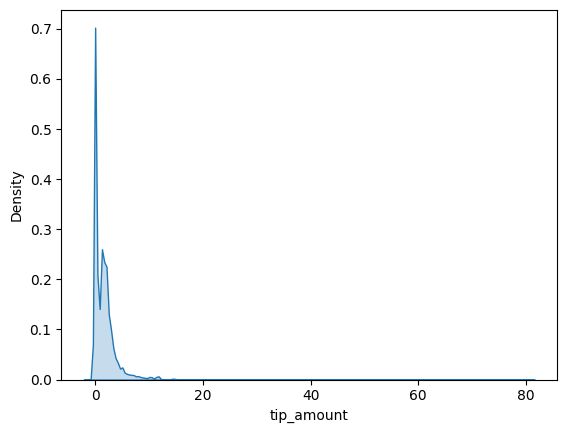

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


aa density plot che for extra


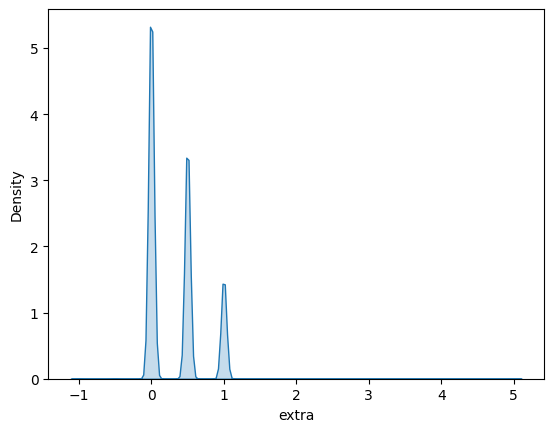

In [9]:
# density plot
for col in columns:
    sns.kdeplot(df[col], fill=True) # fill=True fills the area under the curve
    print(f"aa density plot che for {col}")
    plt.show()

in extra -> mostly extra's value is in between 0 to 1 and strong peaks at 0, 0.5, 1 suggests that they might be the only possible values

tip amount -> irrespective of the distance or fare, tips are generally in the range of 0 to 10 ruppees

total amount is between 0 to 80 so most of the trips whose data has been collected are short trips and mostly 50 ruppess is the price of travelling for given data

fare amount is almost same as total amount as extras are uncommon

passanger count is discrete value and generally single or a family of 5 is travelling, which seems natural also

In [10]:
pearson_1, _ = pearsonr(df['trip_distance'], df['fare_amount'])
pearson_2, _ = pearsonr(df['fare_amount'], df['tip_amount'])

spearman_1, _ = spearmanr(df['trip_distance'], df['fare_amount'])
spearman_2, _ = spearmanr(df['fare_amount'], df['tip_amount'])

print(f"Pearson Correlation (Trip_distance vs Fare_amount): {pearson_1}")
print(f"Pearson Correlation (Fare_amount vs Tip_amount):   {pearson_2}")

print(f"Spearman Correlation (Trip_distance vs Fare_amount): {spearman_1}")
print(f"Spearman Correlation (Fare_amount vs Tip_amount):   {spearman_2}")

Pearson Correlation (Trip_distance vs Fare_amount): 0.7658757554736451
Pearson Correlation (Fare_amount vs Tip_amount):   0.5648608612610356
Spearman Correlation (Trip_distance vs Fare_amount): 0.9340062786986619
Spearman Correlation (Fare_amount vs Tip_amount):   0.3646292428426801


pearson tells us the strength and direction of linear relationship between 2 variables

spearman tells us with higher values in x, how does values in y behave, irrespective of the shape(linear)

here it shows that trip distance's value will increase with increase in fare amount but not necessarily linearly and its relation with tip amount shows that on increasing its value doesn't necessaruly increase tip amount so other features affect this not this strongly

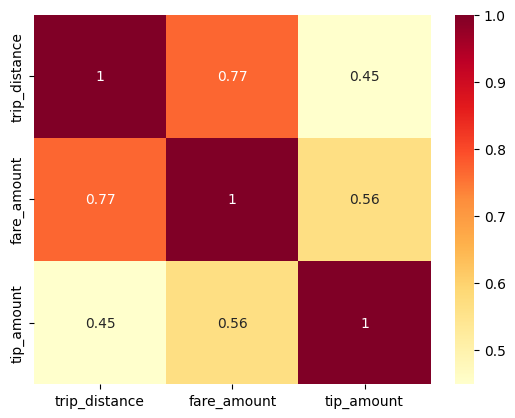

In [11]:
corr_df = df[['trip_distance', 'fare_amount', 'tip_amount']]
corr_matrix = corr_df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.show()


this shows that trip distance is closely related with fare amount and is quite logical also and less related with tip amount as it depends from person to person.